In [55]:
import numpy as np
import pandas as pd

datos = pd.read_csv("datasets/bostonHousing/bostonHousing.csv")

datos.describe().transpose()
datos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

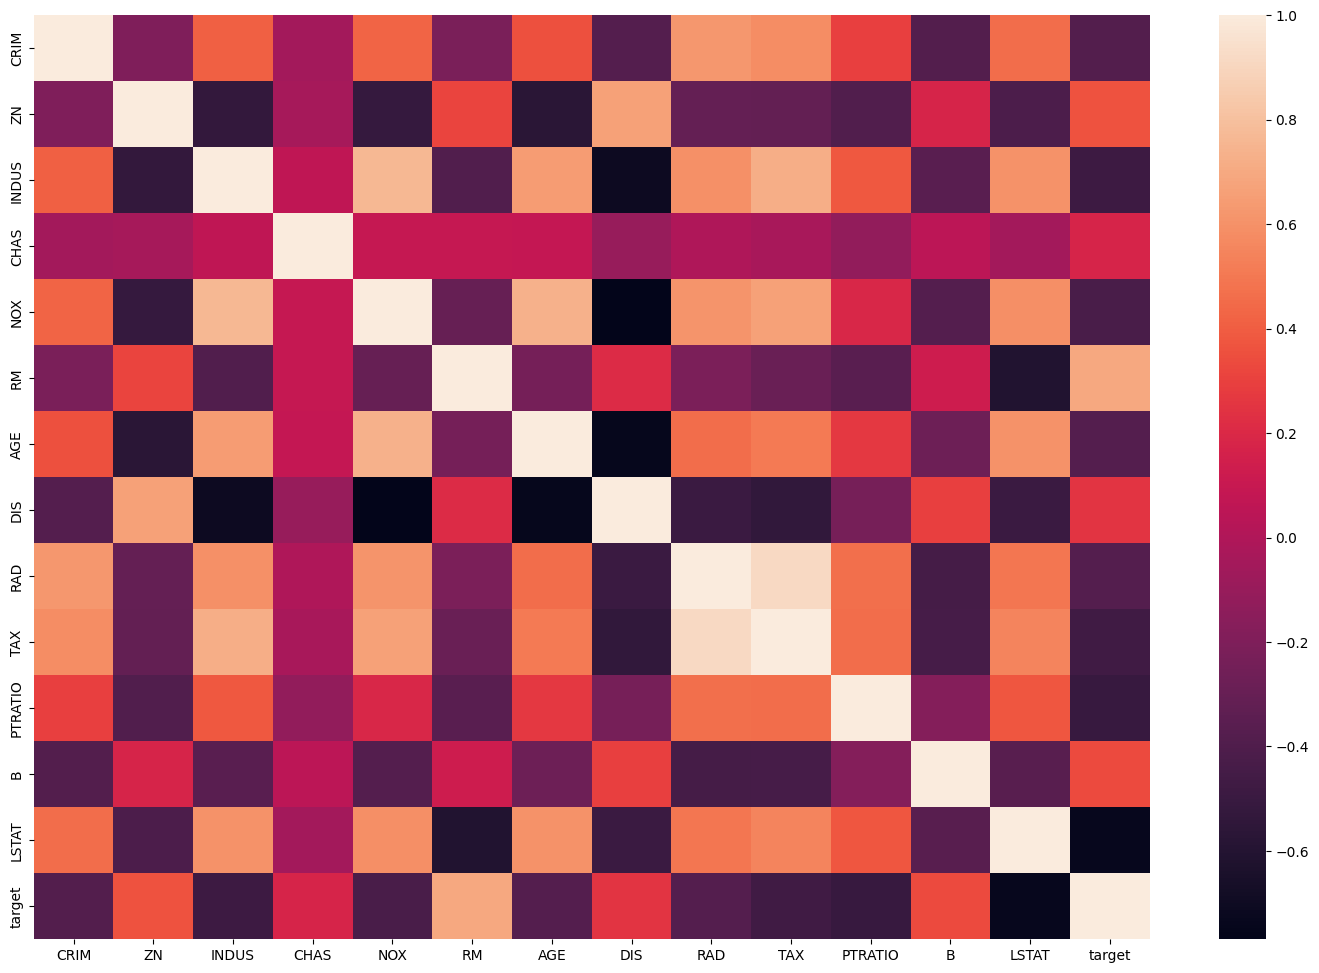

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

cor_matriz = datos.corr()
plt.figure(figsize=(18,12))

sns.heatmap(cor_matriz,linecolor="white",xticklabels="auto",yticklabels="auto",)

1. Creamos los conjuntos de entrenamiento y prueba
    1. Sacar a la columna targert del conjunto de datos para crear el conjunto X
    2. Establecer el conjunto Y

2. Entrenamos el modelo

3. Métricas
    1. R^2
    2. Error cuadrático medio (sklearn)
    3. Raiz error cuadrático medio (numpy)

4. Coeficiente de regresión
    y=b0 + b1 * x1 + b2 * x2 + ... bn * xn
    Bsub 0,1,2   

5. Lanzar una predicción

6. Mostrar un diagrama de dispersión que relacione los diagramas reales y las predicciones    

In [57]:
#Conjunto de entrenamiento X e Y

x= datos.drop('target', axis=1)
y = datos['target']



In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y, train_size=0.7, random_state=1100)


from sklearn.linear_model import LinearRegression

lineal = LinearRegression()
lineal.fit(x_train, y_train)


LinearRegression()

In [59]:
#Métricas #Bondad del ajuste
from sklearn.metrics import mean_squared_error, r2_score

y_pred=lineal.predict(x_test)

mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_pred, y_test)

print("MSE: {:.2f}".format(mse))
print("RMSE: {:.3f}".format(rmse))
print("R^2: {:.2f}".format(r2))



MSE: 23.90
RMSE: 4.889
R^2: 0.63


In [60]:
pendiente = lineal.coef_[0]
pendiente

-0.13919778215216003

In [61]:
ordenada = lineal.intercept_
ordenada

36.87825188038863

Lanzamos las regresión polinómica

In [62]:
from sklearn.preprocessing import PolynomialFeatures

#Preprocesamiento 
x_poly = PolynomialFeatures(degree=2).fit_transform(x)

#División
xp_train, xp_test, y_train, y_test = train_test_split(x_poly, y)

#Entrenamiento
poly = LinearRegression()
poly.fit(x_poly, y)

LinearRegression()

In [63]:
y_pred = poly.predict(xp_test)

mse = mean_squared_error(y_pred, y_test)
rmse= np.sqrt(mse)
r2 = r2_score(y_pred, y_test)

print("MSE: {:.2f}".format(mse))
print("RMSE: {:.3f}".format(rmse))
print("R^2: {:.2f}".format(r2))

MSE: 7.75
RMSE: 2.784
R^2: 0.89
